In [ ]:
import pandas as pd

df = pd.read_csv('https://www.dropbox.com/s/k3b8f9x3w7yxbih/housing_project.csv?dl=1')

df.head()

,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Heating,CentralAir,TotalSF,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,SalePrice
0,8450,1Fam,2Story,7,5,2003,Gable,GasA,Y,1710,2,1,3,Gd,8,2,208500
1,9600,1Fam,1Story,6,8,1976,Gable,GasA,Y,1262,2,0,3,TA,6,2,181500
2,11250,1Fam,2Story,7,5,2001,Gable,GasA,Y,1786,2,1,3,Gd,6,2,223500
3,9550,1Fam,2Story,7,5,1915,Gable,GasA,Y,1717,1,0,3,Gd,7,3,140000
4,14260,1Fam,2Story,8,5,2000,Gable,GasA,Y,2198,2,1,4,Gd,9,3,250000


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/415-Projects/415FinalProject/')
import FinalProject as my


# Univarite

In [ ]:
def calcUnivariateStatsViz(df) :
  import seaborn as sns
  from matplotlib import pyplot as plt

  lstValues = []
  newDF = []

  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) :
      f, (ax_box, ax) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15,.65)})
      sns.set(style = 'ticks')
      flierprops = dict(marker= 'o', markersize = 4, markerfacecolor = 'none', linestyle = 'none', markeredgecolor = 'gray')
      sns.boxplot(x=df[col], ax=ax_box, fliersize = 4, width = 0.5, linewidth=1, flierprops=flierprops)
      sns.histplot(x=df[col], ax=ax)
      ax_box.set(yticks=[])
      ax_box.set(xticks=[])
      ax_box.set_xlabel()
      sns.despine(ax=ax)
      sns.despine(ax=ax_box, left=True, bottom=True)
      ax_box.set_title(col, fontsize=14)

      text = 'Count: ' + str(df[col].count()) + '\n'
      text += 'Unique: ' + str(round(df[col].nunique(),2)) + '\n'
      text += 'Data Type: ' + str(df[col].dtype) + '\n'
      text += 'Missing: ' + str(round(df[col].isnull().sum(),2)) + '\n'
      text += 'Mode: ' + str(df[col].mode().values[0]) + '\n'
      text += 'Min: ' + str(round(df[col].min(),2)) + '\n'
      text += 'Max: ' + str(round(df[col].max(),2)) + '\n'
      text += '25%: ' + str(round(df[col].quantile(.25), 2)) + '\n'
      text += 'Median: ' + str(round(df[col].median(),2)) + '\n'
      text += '75%: ' + str(round(df[col].quantile(.75),2)) + '\n'
      text += 'Std dev: ' + str(round(df[col].std(),2)) + '\n'
      text += 'Mean: ' + str(round(df[col].mean(), 2)) + '\n'
      text += 'Skew: ' + str(round(df[col].skew(), 2)) + '\n'
      text += 'Kurt: ' + str(round(df[col].kurt(), 2)) + '\n'
      ax.text(0.9, 0.25, text, fontsize=10, transform=plt.gcf().transFigure)

      lstValues.append(col)
      lstValues.append(df[col].count())
      lstValues.append(round(df[col].nunique(),2))
      lstValues.append(df[col].dtype)
      lstValues.append(round(df[col].isnull().sum(),2))
      lstValues.append(df[col].mode().values[0])
      lstValues.append(round(df[col].min(),2))
      lstValues.append(round(df[col].max(),2))
      lstValues.append(round(df[col].quantile(.25), 2))
      lstValues.append(round(df[col].median(),2))
      lstValues.append(round(df[col].quantile(.75),2))
      lstValues.append(round(df[col].std(),2))
      lstValues.append(round(df[col].mean(), 2))
      lstValues.append(round(df[col].skew(), 2))
      lstValues.append(round(df[col].kurt(), 2))

      newDF.append(lstValues)
      lstValues = []
    
    else :
      ax_count = sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette=sns.color_palette('RdBu_r',df[col].nunique()))
      sns.despine(ax=ax_count)
      ax_count.set_title(col)
      ax_count.set_xlabel('')
      ax_count.set_xlabel('')

      text = 'Count: ' + str(df[col].count()) + '\n'
      text += 'Unique: ' + str(df[col].nunique()) + '\n'
      text += 'Data Type: ' + str(df[col].dtype) + '\n'
      text += 'Missing: ' + str(round(df[col].isna().sum(),2))
      ax_count.text(0.9, 0.5, text,fontsize=10, transform=plt.gcf().transFigure)

      lstValues.append(col)
      lstValues.append(df[col].count())
      lstValues.append(round(df[col].nunique(),2))
      lstValues.append(str(df[col].dtype))
      lstValues.append(round(df[col].isnull().sum(),2))
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')
      lstValues.append('-')


      newDF.append(lstValues)
      lstValues = []
    plt.show()
  
  result = pd.DataFrame(newDF, columns=['', 'Count', 'Unique', 'Type','Missing','Mode', 'Min','Max', '25%', 'Median', '75%','Std dev', 'Mean', 'Skew', 'Kurt'])
  return result

ValueError: ignored

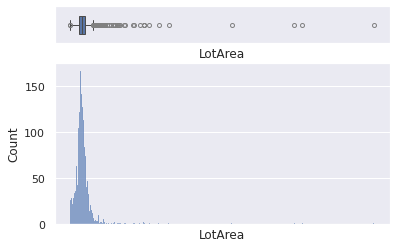

In [ ]:
calcUnivariateStatsViz(df)

# Bivariate

In [ ]:
def calculateTTest(df, feature, label):
  from scipy import stats
  import pandas as pd

  groups = df[feature].unique()  
  group_labels = []         
  
  for g in groups:               
    group_labels.append(df[df[feature] == g][label])
    
  return stats.ttest_ind(*group_labels)

In [ ]:
calculateTTest(df, 'sex', 'charges')

Ttest_indResult(statistic=-2.097546590051688, pvalue=0.03613272100592976)

In [ ]:
def calculateANOVA(df, feature, label):
  from scipy import stats
  import pandas as pd

  groups = df[feature].unique()  
  group_labels = []         
  
  for g in groups:               
    group_labels.append(df[df[feature] == g][label])
    
  return stats.f_oneway(*group_labels) 

In [ ]:
calculateANOVA(df, 'region', 'charges')

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [ ]:
def createBarChart(df, feature, label):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from scipy.stats import f_oneway
  from statsmodels.stats.multicomp import pairwise_tukeyhsd

  text = ""
  unique_groups = df[feature].nunique()

    
  if unique_groups > 2:

    tukey = pairwise_tukeyhsd(endog=df[label], groups=df[feature], alpha=0.05)
    print(tukey)

    f, p = calculateANOVA(df, feature, label)
    text = 'ANOVA' + '\n'
    text += 'F-Stat: ' + str(round(f, 2)) + '\n'
    text += 'p-value: ' + str(round(p, 2)) 

  else :
    t, p = calculateTTest(df, feature, label)
    text = 'T-Test' + '\n'
    text += 'T: ' + str(round(t, 2)) + '\n'
    text += 'p-value: ' + str(round(p, 2))
    
  
  ax = sns.barplot(x = df[feature], y = df[label])
  ax.text(1, 0.1, text, fontsize=12, transform = plt.gcf().transFigure)
  plt.title(feature + ' and ' + label)
  plt.show()

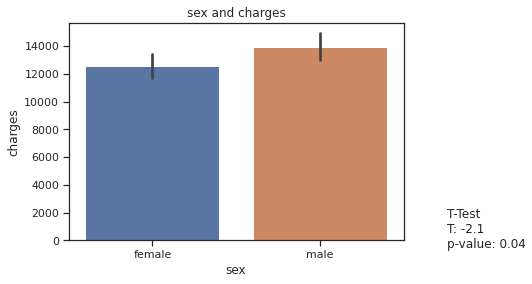

In [ ]:
createBarChart(df, 'sex', 'charges')

In [ ]:
def createScatterPlot(df, feature, label):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy import stats
  from sklearn.metrics import r2_score
  import seaborn as sns

  model = np.polyfit(df[feature], df[label], 2)
  predict = np.poly1d(model)
  r, p = stats.pearsonr(df[feature], df[label])
  r2 = r2_score(df[label], predict(df[feature]))

  text = 'r:' + str(round(r, 2)) + '\n'
  text += 'r2: ' + str(round(r2,2)) + '\n'  
  text += 'p-value: ' + str(round(p, 2)) + '\n'
  text += 'y = ' + str(round(model[0], 2)) + 'x +' + str(round(model[1], 2))

  sns.set(color_codes = True)
  ax = sns.jointplot(x=df[feature],y=df[label], kind='reg')
  ax.fig.suptitle(feature + ' and ' + label)
  ax.fig.text(1, 0.8, text, fontsize=12, transform=plt.gcf().transFigure)
  ax.fig.tight_layout()
  ax.fig.subplots_adjust(top=0.95)  

  plt.show()


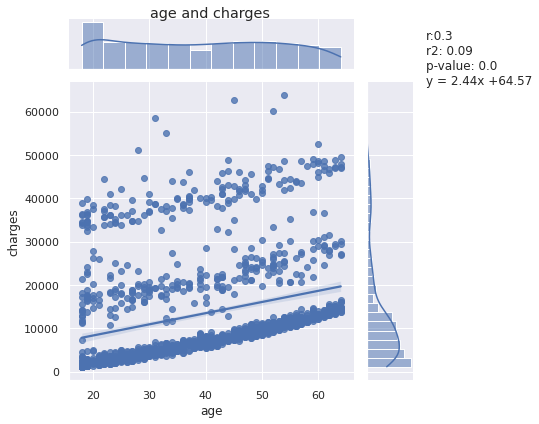

In [ ]:
createScatterPlot(df, 'age', 'charges')

In [ ]:
def calculateBivariateStatsViz(df, label):
  from scipy import stats
  import seaborn as sns
  from matplotlib import pyplot as plt
  import pandas as pd

  lstValues = []
  newDF = []

  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      createScatterPlot(df, col, label)
      r,p = stats.pearsonr(df[col], df[label])
      lstValues.append(col)
      lstValues.append('r')

      if r > 0:
        lstValues.append(1.0)
      else:
        lstValues.append(-1.0)
      lstValues.append(round(abs(r),2))
      lstValues.append(round(p,2))
      newDF.append(lstValues)
      lstValues = []

    else:
      createBarChart(df, col, label)

      if df[col].nunique() == 2:
        t,p=calculateTTest(df,col,label)
        lstValues.append(col)
        lstValues.append('T')
        lstValues.append('')
        lstValues.append(round(t,2))
        lstValues.append(round(p,2))
        newDF.append(lstValues)
        lstValues = []

      elif df[col].nunique() > 2 :
        f,p=calculateANOVA(df,col,label)
        lstValues.append(col)
        lstValues.append('F')
        lstValues.append('')
        lstValues.append(round(f,2))
        lstValues.append(round(p,2))
        newDF.append(lstValues)
        lstValues = []
  
  result = pd.DataFrame(newDF, columns=['', 'Stat', '+/-', 'Effect Size', 'P-Value'])

  return result

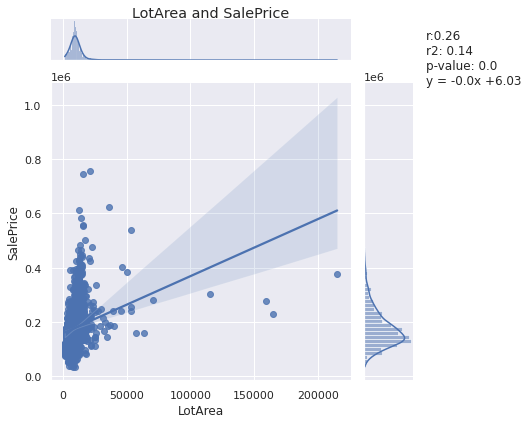

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -57331.5493  0.001 -96158.8945 -18504.2041   True
  1Fam Duplex -52222.7305  0.001 -82452.2867 -21993.1742   True
  1Fam  Twnhs -49852.1795  0.001   -82977.29 -16727.0689   True
  1Fam TwnhsE  -3804.4653    0.9 -24712.6042  17103.6737  False
2fmCon Duplex   5108.8189    0.9  -43333.657  53551.2947  False
2fmCon  Twnhs   7479.3698    0.9 -42820.9318  57779.6714  False
2fmCon TwnhsE   53527.084 0.0067  10283.6144  96770.5537   True
Duplex  Twnhs    2370.551    0.9 -41633.8088  46374.9108  False
Duplex TwnhsE  48418.2652 0.0021  12693.4698  84143.0606   True
 Twnhs TwnhsE  46047.7142  0.009   7841.5906  84253.8378   True
---------------------------------------------------------------


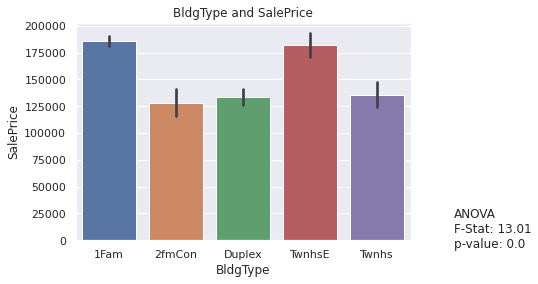

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
1.5Fin 1.5Unf -32966.7403 0.7517   -97462.063  31528.5825  False
1.5Fin 1Story  32868.7377  0.001   12370.7786  53366.6968   True
1.5Fin 2.5Fin  76883.2597 0.0993   -6898.6221 160665.1416  False
1.5Fin 2.5Unf  14237.8052    0.9  -57870.1577  86345.7681  False
1.5Fin 2Story  66935.0238  0.001   45334.1657  88535.8818   True
1.5Fin SFoyer  -8042.2538    0.9   -50343.525  34259.0175  False
1.5Fin   SLvl  23586.6444 0.4213  -10587.9192  57761.2079  False
1.5Unf 1Story   65835.478 0.0299    3493.3691 128177.5868   True
1.5Unf 2.5Fin    109850.0 0.0255    7449.9222 212250.0778   True
1.5Unf 2.5Unf  47204.5455 0.7591  -45886.4344 140295.5253  False
1.5Unf 2Story   99901.764  0.001   37188.3741  162615.154   True
1.5Unf SFoyer  24924.4865    0.9  -47572.2014  97421.1744  False
1.5Unf   SLvl  56553.3846

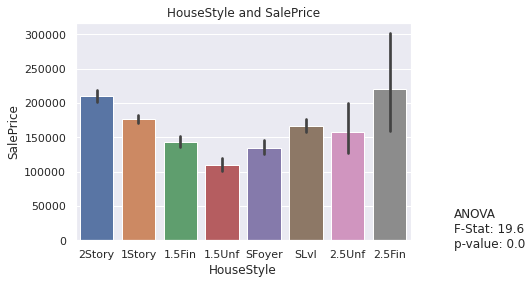

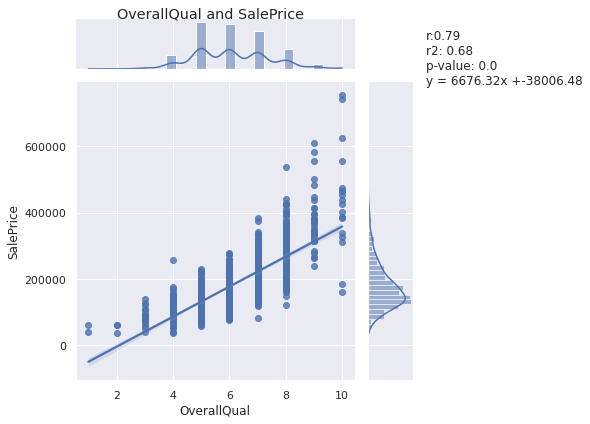

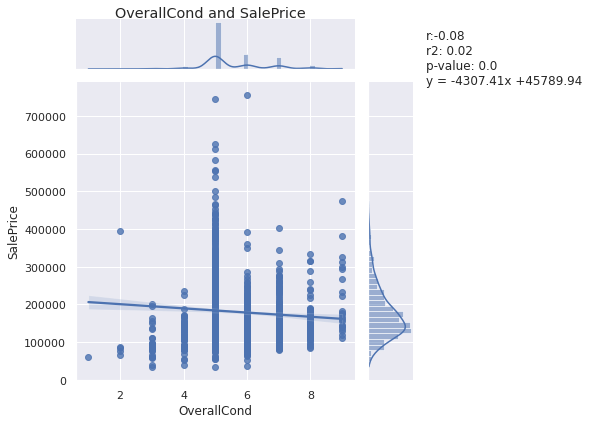

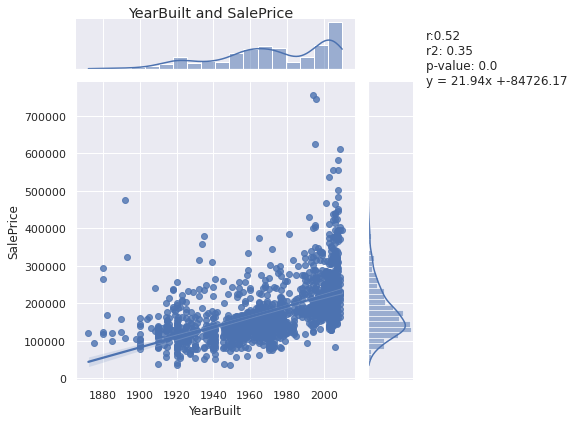

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
   Flat   Gable -23206.0438 0.8867  -84689.4593  38277.3717  False
   Flat Gambrel -45780.9091 0.6735 -136084.9493  44523.1311  False
   Flat     Hip  24186.9336 0.8711  -38323.2077  86697.0749  False
   Flat Mansard -14121.5714    0.9 -117460.4825  89217.3396  False
   Flat    Shed     30310.0    0.9 -137118.1716 197738.1716  False
  Gable Gambrel -22574.8653    0.9  -89356.4397  44206.7092  False
  Gable     Hip  47392.9774  0.001   32816.3945  61969.5603   True
  Gable Mansard   9084.4724    0.9  -74485.1964  92654.1412  False
  Gable    Shed  53516.0438    0.9 -102487.6474  209519.735  False
Gambrel     Hip  69967.8427 0.0382    2239.8125 137695.8728   True
Gambrel Mansard  31659.3377    0.9  -74916.9207  138235.596  False
Gambrel    Shed  76090.9091 0.7688  -93354.5422 245536.3604  F

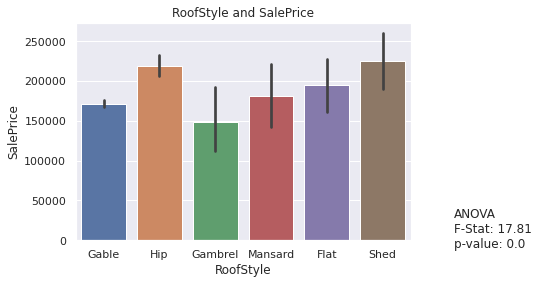

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
 Floor   GasA  109521.1954 0.7086 -115990.1434 335032.5342  False
 Floor   GasW   94132.1667  0.839 -137477.6274 325741.9608  False
 Floor   Grav    2771.4286    0.9 -238225.9652 243768.8224  False
 Floor   OthW      53250.0    0.9 -222847.1998 329347.1998  False
 Floor   Wall      19600.0    0.9 -232441.1074 271641.1074  False
  GasA   GasW  -15389.0287    0.9  -68857.7949  38079.7375  False
  GasA   Grav -106749.7668  0.005 -192163.7941 -21335.7395   True
  GasA   OthW  -56271.1954    0.9  -215787.577 103245.1862  False
  GasA   Wall  -89921.1954 0.2057 -202795.1607  22952.7699  False
  GasW   Grav  -91360.7381 0.0987 -191776.3188   9054.8427  False
  GasW   OthW  -40882.1667    0.9 -208909.5716 127145.2382  False
  GasW   Wall  -74532.1667 0.5234 -199144.6253  50080.2919  False
  Grav   O

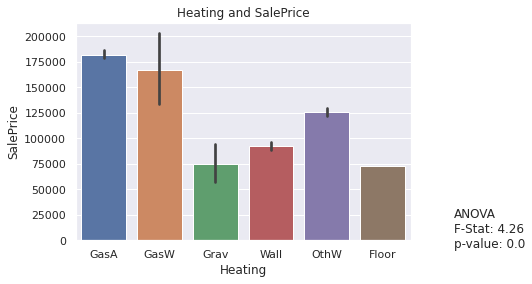

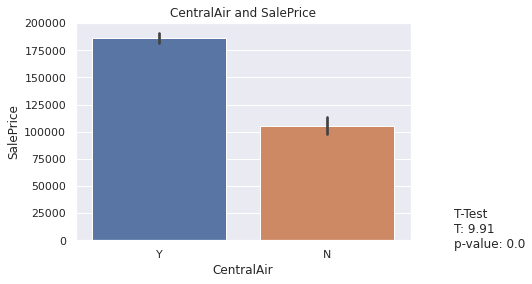

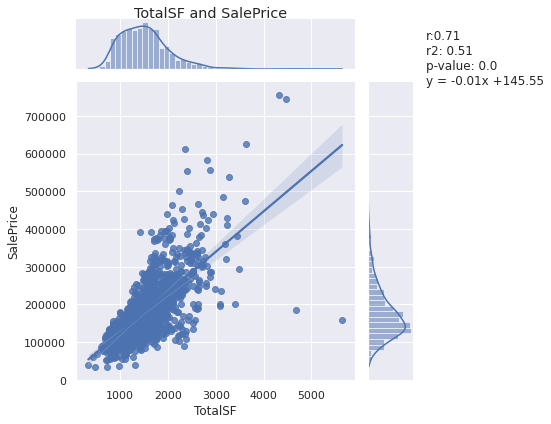

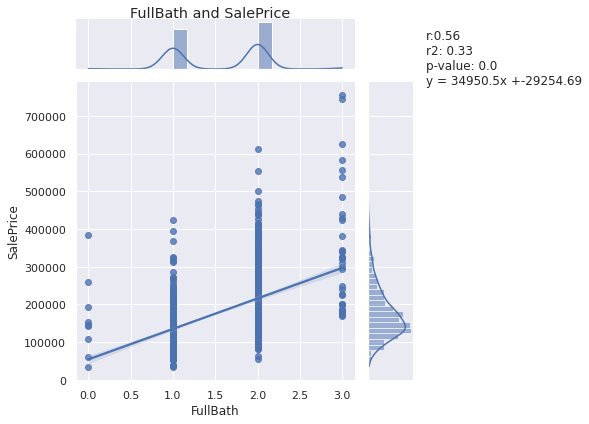

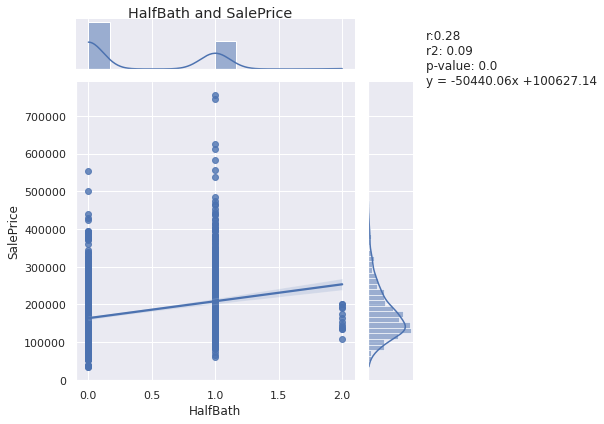

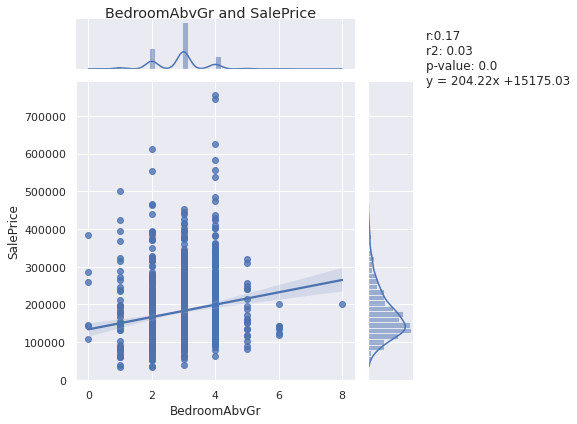

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -222989.4649  0.001 -251454.2769 -194524.6528   True
    Ex     Gd -116438.6461  0.001 -132752.1208 -100125.1714   True
    Ex     TA -188592.1584  0.001 -204662.7844 -172521.5325   True
    Fa     Gd  106550.8188  0.001   81616.8092  131484.8283   True
    Fa     TA   34397.3064 0.0021    9621.5039    59173.109   True
    Gd     TA  -72153.5123  0.001  -80503.6215  -63803.4031   True
------------------------------------------------------------------


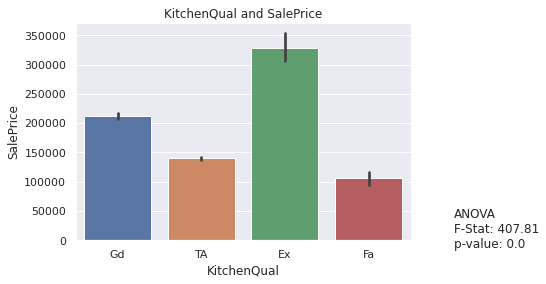

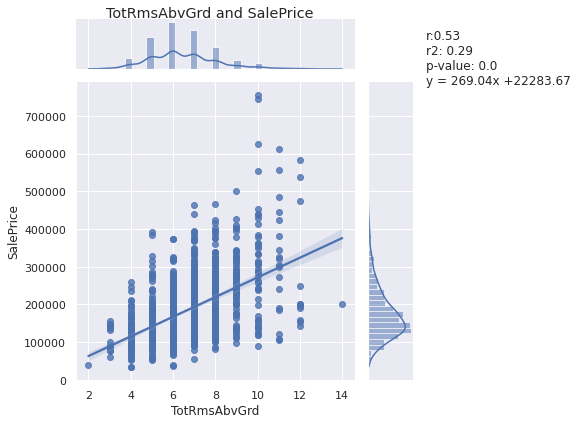

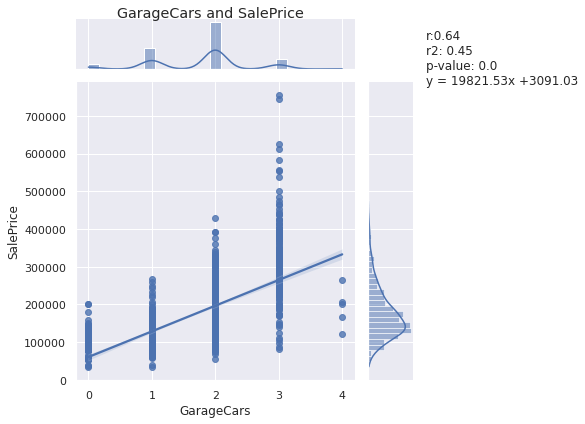

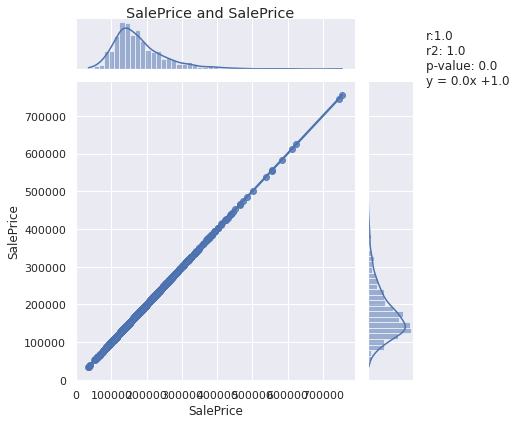

,,Stat,+/-,Effect Size,P-Value
0,LotArea,r,1.0,0.26,0.0
1,BldgType,F,,13.01,0.0
2,HouseStyle,F,,19.60,0.0
3,OverallQual,r,1.0,0.79,0.0
4,OverallCond,r,-1.0,0.08,0.0
5,YearBuilt,r,1.0,0.52,0.0
6,RoofStyle,F,,17.81,0.0
7,Heating,F,,4.26,0.0
8,CentralAir,T,,9.91,0.0
9,TotalSF,r,1.0,0.71,0.0


In [ ]:
calculateBivariateStatsViz(df, 'SalePrice')

# Assumptions

In [ ]:
def assumption1LinearRelationship(df, label):
  import seaborn as sns
  from scipy import stats
  import matplotlib.pyplot as plt
  import pandas as pd 
  import numpy as np
 
  df_rvalues = pd.DataFrame(columns=['R-Value'])
 
  for col in df:
    if col != label:
      if df[col].isnull().sum() == 0:
        if pd.api.types.is_numeric_dtype(df[col]):
          r, p = stats.pearsonr(df[col], df[label])
          if abs(r) < 0.5:
            createScatterPlot(df, col, label)
            df_rvalues.loc[col] = [round(r,2)]
  
  return df_rvalues.sort_values(by=['R-Value'], ascending=False)

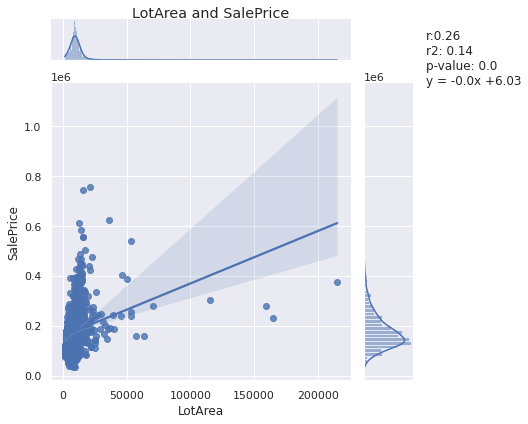

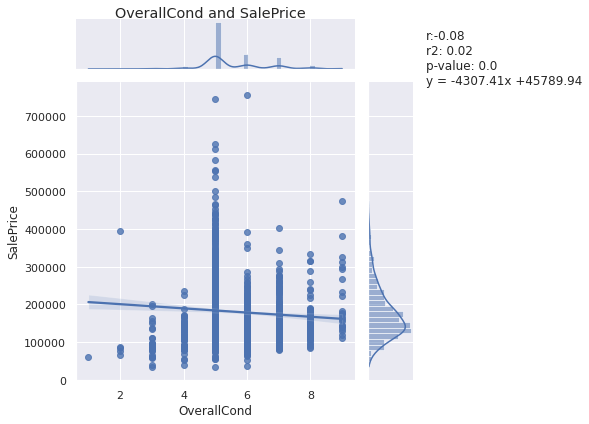

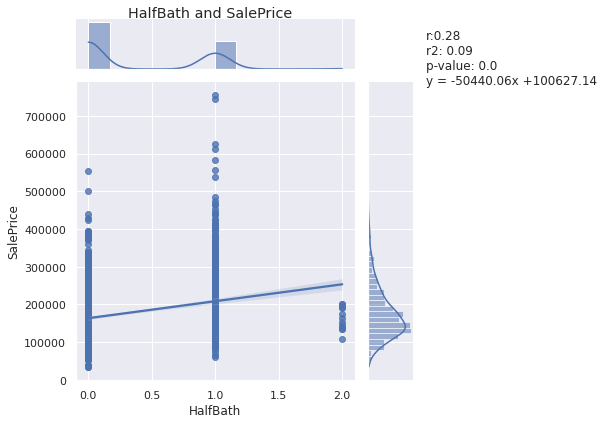

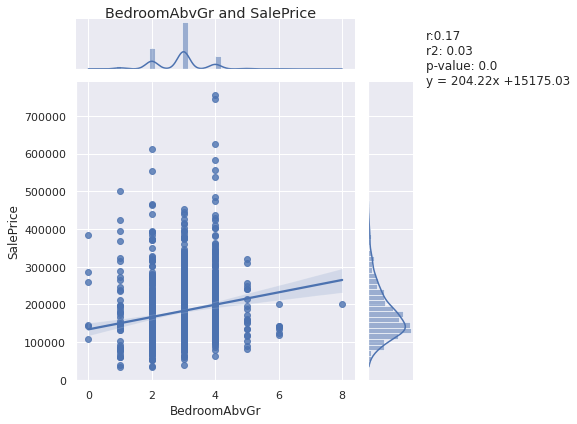

,R-Value
HalfBath,0.28
LotArea,0.26
BedroomAbvGr,0.17
OverallCond,-0.08


In [ ]:
assumption1LinearRelationship(df, 'SalePrice')

In [ ]:
def assumption2Multicollinearity(df, label):

  import pandas as pd
  from sklearn.linear_model import LinearRegression

  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  newdf = df.select_dtypes(include=numerics)

  newdf = newdf.drop([label], axis = 1)

  vif_dict = {}

  for col in newdf:
    y =  newdf[col]
    X = newdf.drop(columns=[col])

    r_squared = LinearRegression().fit(X, y).score(X, y)

    vif = 1/(1 - r_squared)
    vif_dict[col] = round(vif,4)

  return pd.DataFrame({'VIF': vif_dict})


In [ ]:
assumption2Multicollinearity(df,'charges')

,VIF
age,1.0138
bmi,1.0122
children,1.0019


In [ ]:
def assumption3Independence(df, label):
  from statsmodels.stats.stattools import durbin_watson
  
  results = mlr(df,label)
  text = ""
  dw = float(durbin_watson(results.resid))
  text += str(round(dw, 3))

  if dw < 1.5 and dw > 2.5 :
    text += ", The Independence Assumption is NOT met"
  else :
    text += ", The Independence Assumption is met"

  return text

In [ ]:
assumption3Independence(df, 'charges')

'2.088, The Independence Assumption is met'

In [ ]:
def assumption4Homoscedasticity(df, label):
  from statsmodels.compat import lzip
  import statsmodels.stats.api as sms
  import numpy as np
  import pandas as pd
  import statsmodels.api as sm

  for col in df: 
    if not pd.api.types.is_numeric_dtype(df[col]): 
      df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))

  y = df[label]
  X = df.select_dtypes(np.number).assign(const=1)
  X = X.drop(columns=[label])

  model = sm.OLS(y,X).fit()

  bp, p, f, fp = sms.het_breuschpagan(model.resid, model.model.exog)

  bp_data = [round(bp, 4), round(p,4)]

  names = ['Lagrange multiplier statistic', 'p-value']
  bp_data_dict = dict(lzip(names, bp_data))
  bp_df = pd.DataFrame(bp_data_dict, index = ['Breusch-Pagan Values'])

  p = bp_df.iloc[0]['p-value']

  text = ""
  if p < 0.05 :
    text += "The Homoscedasticity Assumption is NOT met"
  else :
    text += "The Homoscedasticity Assumption IS met"

  print(bp_df)

  return text


In [ ]:
assumption4Homoscedasticity(df, 'charges')

                      Lagrange multiplier statistic  p-value
Breusch-Pagan Values                       121.7436      0.0


'The Homoscedasticity Assumption is NOT met'

In [ ]:
def assumption5MultivariateNormality(df, label):
  import matplotlib.pyplot as plt
  from statsmodels.compat import lzip
  from scipy import stats
  import numpy as np
  import statsmodels.api as sm
  from statsmodels.stats.stattools import jarque_bera

  results = mlr(df,label)

  jb, p, skew, kurt = jarque_bera(results.resid)
  jb_data = [round(jb, 4), p]
  names = ['Jarque-Bera test statistic', 'p-value']
  jb_data_dict= dict(lzip(names, jb_data))
  jb_df = pd.DataFrame(jb_data_dict, index = ['Jarque-Bera Values'])
  print(jb_df)
  text = ""

  fig, ax = plt.subplots()
  _,(_,_,r) = stats.probplot(results.resid, plot=ax, fit=True)
  rsquared = round(r**2,3)

  if p < 0.05 :
    text += "The Multivariate Normality Assumption is NOT met"
  else :
    text += "The Multivariate Normality Assumption IS met"

  return text

                    Jarque-Bera test statistic        p-value
Jarque-Bera Values                    718.8873  7.863469e-157


'The Multivariate Normality Assumption is NOT met'

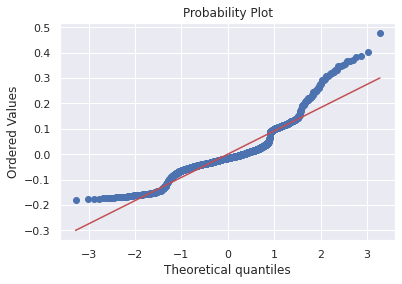

In [ ]:
assumption5MultivariateNormality(df, 'charges')

In [ ]:
def assumptions(df, label) :
  print("Assumption #1: Linear Relationship\n")
  print(assumption1LinearRelationship(df, label))
  print("\nAssumption #2: Multicollinearity\n")
  print(assumption2Multicollinearity(df, label))
  print("\nAssumption #3: Independence\n")
  print(assumption3Independence(df, label))
  print("\nAssumption #4: Homoscedasticity\n")
  print(assumption4Homoscedasticity(df, label))
  print("\nAssumption #5: Multivariate Normality")
  print(assumption5MultivariateNormality(df, label))

Assumption #1: Linear Relationship



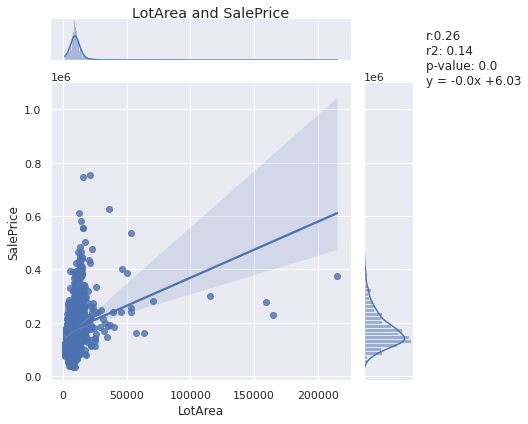

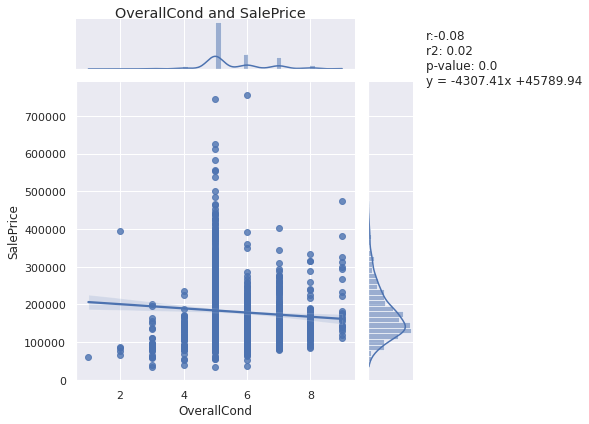

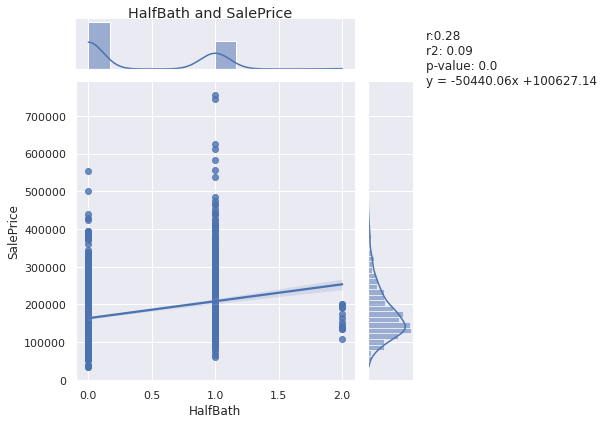

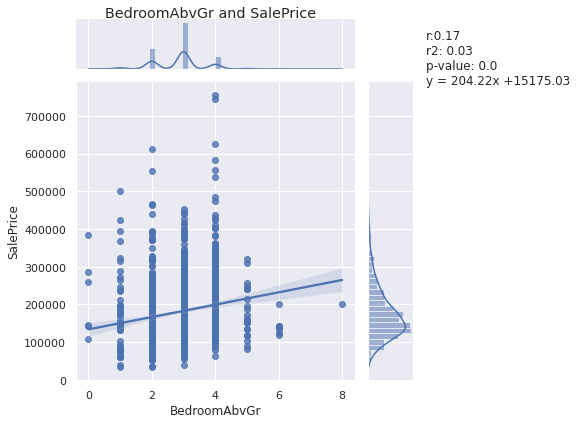

              R-Value
HalfBath         0.28
LotArea          0.26
BedroomAbvGr     0.17
OverallCond     -0.08

Assumption #2: Multicollinearity

                 VIF
BedroomAbvGr  2.0770
FullBath      2.3991
GarageCars    1.8731
HalfBath      1.4143
LotArea       1.1070
OverallCond   1.2246
OverallQual   2.6941
TotRmsAbvGrd  4.3344
TotalSF       5.1519
YearBuilt     2.5462

Assumption #3: Independence

1.983, The Independence Assumption is met

Assumption #4: Homoscedasticity

                      Lagrange multiplier statistic  p-value
Breusch-Pagan Values                       424.0384      0.0
The Homoscedasticity Assumption is NOT met

Assumption #5: Multivariate Normality
                    Jarque-Bera test statistic  p-value
Jarque-Bera Values                  90325.6564      0.0
The Multivariate Normality Assumption is NOT met


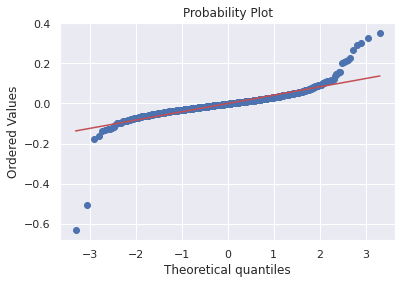

In [ ]:
assumptions(df, 'SalePrice')

# MLR

In [ ]:
def mlr(df, label):
  from sklearn import preprocessing
  import numpy as np
  import pandas as pd
  import statsmodels.api as sm

  #create dummy codes
  df_dummy = df.copy()

  for col in df_dummy:
    if not pd.api.types.is_numeric_dtype(df_dummy[col]): #if the value is not numeric, it must be categorical so we need to create dummy variables
      df_dummy = df_dummy.join(pd.get_dummies(df_dummy[col], prefix=col, drop_first=True))

  df_num = df_dummy.select_dtypes(np.number)

  df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_num), columns=df_num.columns)

  y = df_minmax[label]
  X = df_minmax.select_dtypes(np.number).assign(const=1)
  X=df_minmax.drop(columns=[label]).assign(const=1)

  model = sm.OLS(y,X)
  results = model.fit()

  return results


In [ ]:
mlr(df, 'charges')

In [ ]:
def calculateMetrics(df, label):
  import numpy as np
  import statsmodels.api as sm

  #create dummy codes
  df_dummy = df.copy()

  for col in df_dummy:
    if not pd.api.types.is_numeric_dtype(df_dummy[col]): #if the value is not numeric, it must be categorical so we need to create dummy variables
      df_dummy = df_dummy.join(pd.get_dummies(df_dummy[col], prefix=col, drop_first=True))

  y = df_dummy[label]
  X = df_dummy.select_dtypes(np.number).assign(const=1)
  X = X.drop(columns=[label])

  model=sm.OLS(y,X)
  results=model.fit()

  residuals = np.array(df_dummy[label]) - np.array(results.fittedvalues)
  rmse = np.sqrt(sum((residuals**2)) / len(df_dummy[label]))
  mae = np.mean(abs(residuals))

  metrics = {
      "R-squared": str(round(results.rsquared, 4)),
      "RMSE": str(round(rmse, 4)),
      "MAE": str(round(mae, 4)),
      "Label mean": str(round(df_dummy[label].mean(), 4))
  }

  return metrics

In [ ]:
calculateMetrics(df, 'charges')

{'R-squared': '0.7509',
 'RMSE': '6041.6797',
 'MAE': '4170.8869',
 'Label mean': '13270.4223'}

In [ ]:
def calculateMLRandMetrics(df, label):
  
  print(mlr(df,label).summary())
  print("\nMLR Metrics\n")
  print(calculateMetrics(df,label))

In [ ]:
calculateMLRandMetrics(df, 'SalePrice')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     182.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:35:23   Log-Likelihood:                 2389.3
No. Observations:                1460   AIC:                            -4707.
Df Residuals:                    1424   BIC:                            -4516.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LotArea               0.1682      0.02